In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [235]:
with open('ultimate_data_challenge.json') as f:
    ultimate_data_json=json.load(f)
    
with open('logins.json') as f:
    logins=json.load(f)

In [116]:
logins_df=pd.DataFrame(logins)
logins_df['login_time']=pd.to_datetime(logins_df['login_time'],errors='coerce')

In [117]:
bins_dt = pd.date_range(logins_df['login_time'].min(), logins_df['login_time'].max(), freq='15T',normalize=True)
bins_str = bins_dt.astype(str).values
labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

logins_df['time_bins'] = pd.cut(logins_df['login_time'], bins=bins_dt, labels=labels, ordered=True)

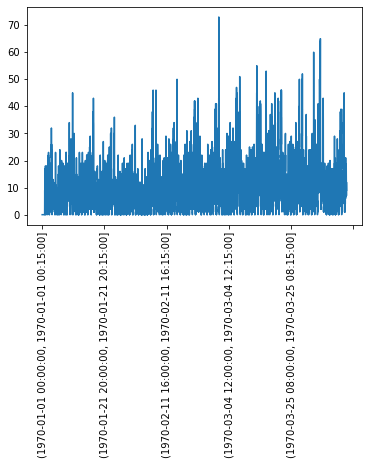

In [118]:
logins_df['time_bins'].value_counts(sort=False).plot()
plt.xticks(rotation = 90)
plt.show()
plt.close()

<AxesSubplot:xlabel='login_time,login_time'>

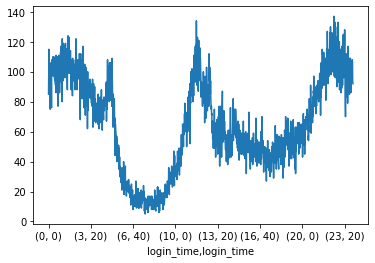

In [210]:
times.groupby([times.dt.hour, times.dt.minute]).count().plot()

<AxesSubplot:xlabel='login_time'>

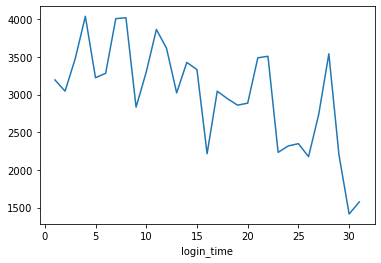

In [124]:
times.groupby([times.dt.day]).count().plot()

<AxesSubplot:xlabel='login_time'>

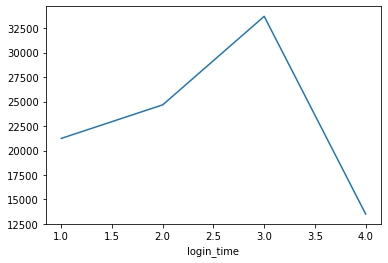

In [127]:
times.groupby([times.dt.month]).count().plot()

<AxesSubplot:xlabel='login_time'>

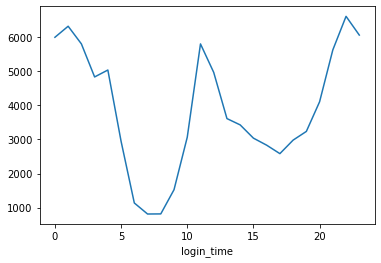

In [128]:
times.groupby([times.dt.hour]).count().plot()

<AxesSubplot:xlabel='login_time'>

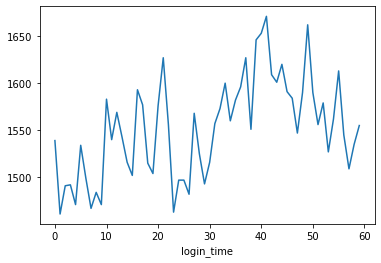

In [129]:
times.groupby([times.dt.minute]).count().plot()

In [217]:
df=logins_df[['login_time']].groupby([logins_df.login_time.dt.hour, logins_df.login_time.dt.minute]).count()

In [218]:
df['chunks']=['h'+str(tup[0]) + ' ' + 'm' + str(int(tup[1] / 15)) for tup in df.index]

In [219]:
df

login_time  chunks
login_time login_time                    
0          0                   85   h0 m0
           1                  100   h0 m0
           2                  115   h0 m0
           3                   89   h0 m0
           4                   93   h0 m0
...                           ...     ...
23         55                  99  h23 m3
           56                 108  h23 m3
           57                 107  h23 m3
           58                  93  h23 m3
           59                  92  h23 m3

[1440 rows x 2 columns]

<AxesSubplot:>

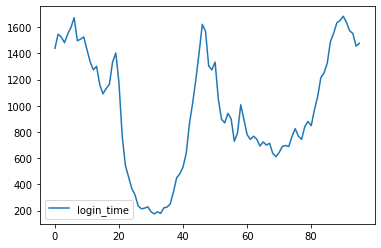

In [232]:
df.groupby('chunks',as_index=False,sort=False).sum().plot()

<AxesSubplot:xlabel='login_time,login_time'>

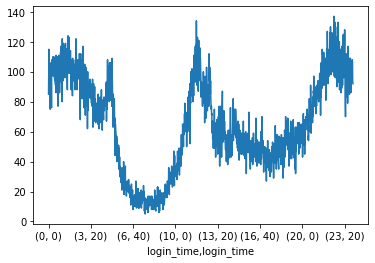

In [211]:
times.groupby([times.dt.hour, times.dt.minute]).count().plot()

In [227]:
df.groupby('chunks').sum()

,login_time
chunks,
h0 m0,1439
h0 m1,1547
h0 m2,1525
h0 m3,1482
h1 m0,1549
...,...
h8 m3,227
h9 m0,252
h9 m1,343


In [216]:
max([tup[0] for tup in df.index])

23

1. The metric I would use is the average of (# of of cars that drove in both cities) / (# of cars in either city) over the week. I would use this metric because it tests directly what we are after. It could be that finer detail would be nice (for example, number of cars that started in once city and drove to the other), but I think as a first pass, this would be fine. 

2.a) The best way to test whether this metric increases is to collect data on this metric first, and then only after implement the program and measure the metric again. I would gather data for this metric over the course of at least a few weeks. This is so that we could have a good sample size to compare our distributions. 10 weeks should be sufficient to see if the amount of change is significant. This is because the amount of money lost due to cancelling the toll would require us to have a significant increase in profits. 
b)I would use a simple t-test or z-test to determine whether the results were significant or not. I would like to see a p value of under 5 for the null hypothesis. 
c)If the results are significant, I would see how large the effect size is. I would like to be able to compare the increase vs the total amount of revenue gained by tolls. Other factors that could influence whether to keep the policy or not are whether the total amount of driving increased (perhaps the additional revenue for car companies would lead to a greater amount of cars on the road).

In [303]:
ultimate.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'date_diffs'],
      dtype='object')

In [236]:
ultimate=pd.DataFrame(ultimate_data_json)


In [293]:
ultimate['last_trip_date']=pd.to_datetime(ultimate['last_trip_date'],errors='coerce')
ultimate['signup_date']=pd.to_datetime(ultimate['signup_date'],errors='coerce')
ultimate['date_diffs']=(ultimate['last_trip_date']-ultimate['signup_date']).dt.days

In [294]:
ultimate.date_diffs

0        143
1         96
2          1
3        170
4         47
        ... 
49995    131
49996      1
49997    111
49998      1
49999     92
Name: date_diffs, Length: 50000, dtype: int64

In [253]:
ultimate[ultimate['avg_rating_of_driver'].isna()].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,8122.000000,0.0,8122.000000,8122.000000,8122.000000,8122.000000,8055.000000
mean,0.593327,NaN,1.078210,8.548067,59.050948,7.506267,4.785984
std,0.606755,NaN,0.310306,26.578461,46.859739,7.758616,0.622122
min,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,NaN,1.000000,0.000000,0.000000,2.410000,5.000000
50%,1.000000,NaN,1.000000,0.000000,100.000000,4.715000,5.000000
75%,1.000000,NaN,1.000000,0.000000,100.000000,10.720000,5.000000
max,5.000000,NaN,5.000000,100.000000,100.000000,160.960000,5.000000


In [255]:
ultimate[~ultimate['avg_rating_of_driver'].isna()].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41878.000000,41878.000000,41878.000000,41878.000000,41878.000000,41878.000000,41744.000000
mean,2.604972,4.601559,1.074095,8.908004,61.289756,5.465290,4.776648
std,4.055311,0.617338,0.200861,18.401140,34.858046,5.151833,0.404109
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.790000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [258]:
ultimate[(ultimate['trips_in_first_30_days']==1) & (~ultimate['avg_rating_of_driver'].isna())].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,10121.0,10121.000000,10121.000000,10121.000000,10121.000000,10121.000000,10044.000000
mean,1.0,4.600010,1.077465,8.842792,59.641033,6.436745,4.792553
std,0.0,0.716257,0.266779,22.631818,40.260226,6.149121,0.497009
min,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,4.300000,1.000000,0.000000,20.000000,2.570000,4.800000
50%,1.0,5.000000,1.000000,0.000000,66.700000,4.320000,5.000000
75%,1.0,5.000000,1.000000,0.000000,100.000000,8.020000,5.000000
max,1.0,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [260]:
import math
ultimate['avg_rating_of_driver']=ultimate['avg_rating_of_driver'].apply(lambda x: 4.6 if math.isnan(x) else x)

In [267]:
ultimate[ultimate['phone'].isna()].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,393.000000
mean,2.396465,4.610859,1.046338,5.620455,66.218687,7.225859,4.815522
std,3.717477,0.533209,0.174052,15.404279,36.140061,9.185866,0.382844
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,4.600000,1.000000,0.000000,50.000000,2.857500,4.800000
50%,1.000000,4.600000,1.000000,0.000000,74.150000,4.465000,5.000000
75%,2.000000,5.000000,1.000000,0.000000,100.000000,8.652500,5.000000
max,27.000000,5.000000,3.000000,100.000000,100.000000,129.890000,5.000000


In [269]:
ultimate[~ultimate['phone'].isna()].describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49406.000000
mean,2.277256,4.601230,1.074991,8.875314,60.883832,5.785418,4.777861
std,3.793300,0.565228,0.222666,19.989018,37.086239,5.669709,0.447114
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [298]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

In [339]:
X=ultimate[['city', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'date_diffs']]

In [340]:
X=pd.get_dummies(X,prefix=['city','phone','ultimate_black_user'], columns = ['city','phone','ultimate_black_user'], drop_first=True)


In [341]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,date_diffs,is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0


In [342]:
ultimate['is_active']=(ultimate['last_trip_date'].max()-ultimate['last_trip_date']).dt.days<31

In [343]:
ultimate['is_active']=ultimate['is_active'].apply(lambda x: 1 if x else 0)

In [359]:
y=ultimate['is_active']
y.sum()/len(y)

0.37608

In [345]:
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score

In [354]:
def objective(trial):
    
    parameter = {
      'max_depth':trial.suggest_int('depth', 3, 5), # show integer parameters between 3 and 5 for depth
      'learning_rate':trial.suggest_loguniform('ourlearning_rate',0.05,0.6), # set a log distribution between 0.05 and 0.5 for learning rate
      'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.4,0.9), # set a uniformly distributed numbers between 0.4 and 0.9 for colsample_bytree
      'subsample':trial.suggest_uniform('sample',0.4,0.9),
      "gamma":trial.suggest_uniform('gamma',0,1),
      "reg_lambda": trial.suggest_int('reg_lambda',0,10),
      "scale_pos_weight": trial.suggest_int('scale_pos_weight',0,10),
    }
    
        
    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-erorr")

    return np.mean(cross_val_score(xgb.XGBClassifier(**parameter), X, y, cv=5,scoring='f1'))


In [360]:
study_clusters = optuna.create_study(direction='maximize',study_name='XGBoost')
study_clusters.optimize(objective,n_trials=50)

[I 2022-08-15 23:09:49,491] A new study created in memory with name: XGBoost
[I 2022-08-15 23:10:00,175] Trial 0 finished with value: 0.9353746562224879 and parameters: {'depth': 3, 'ourlearning_rate': 0.23072314297978416, 'colsample_bytree': 0.6611458785794342, 'sample': 0.8633653926083461, 'gamma': 0.32903651466741224, 'reg_lambda': 4, 'scale_pos_weight': 4}. Best is trial 0 with value: 0.9353746562224879.
[I 2022-08-15 23:10:11,661] Trial 1 finished with value: 0.9306432834355689 and parameters: {'depth': 3, 'ourlearning_rate': 0.18230785343744982, 'colsample_bytree': 0.4483479294243977, 'sample': 0.6510037528300028, 'gamma': 0.24198667956863507, 'reg_lambda': 3, 'scale_pos_weight': 5}. Best is trial 0 with value: 0.9353746562224879.
[I 2022-08-15 23:10:29,399] Trial 2 finished with value: 0.9354047915584545 and parameters: {'depth': 5, 'ourlearning_rate': 0.09823771096420059, 'colsample_bytree': 0.6991819644946613, 'sample': 0.8873149615605651, 'gamma': 0.7000653899283292, 'reg_lam

[I 2022-08-15 23:15:31,595] Trial 24 finished with value: 0.9386833300516046 and parameters: {'depth': 3, 'ourlearning_rate': 0.22709682875748674, 'colsample_bytree': 0.6130680466262357, 'sample': 0.5278716198759262, 'gamma': 0.20764884850512366, 'reg_lambda': 2, 'scale_pos_weight': 3}. Best is trial 4 with value: 0.9468381083409578.
[I 2022-08-15 23:15:43,443] Trial 25 finished with value: 0.9466718935149687 and parameters: {'depth': 3, 'ourlearning_rate': 0.21025401795089907, 'colsample_bytree': 0.6263427258516568, 'sample': 0.6200703926860928, 'gamma': 0.13755685053263028, 'reg_lambda': 2, 'scale_pos_weight': 1}. Best is trial 4 with value: 0.9468381083409578.
[I 2022-08-15 23:15:58,607] Trial 26 finished with value: 0.9340087137692883 and parameters: {'depth': 4, 'ourlearning_rate': 0.21880882210256, 'colsample_bytree': 0.7221596175097302, 'sample': 0.6214963702898298, 'gamma': 0.011472285415592032, 'reg_lambda': 1, 'scale_pos_weight': 5}. Best is trial 4 with value: 0.946838108340

[I 2022-08-15 23:20:19,666] Trial 48 finished with value: 0.0 and parameters: {'depth': 3, 'ourlearning_rate': 0.1522151499599285, 'colsample_bytree': 0.6942338702799565, 'sample': 0.6810495248074269, 'gamma': 0.1115256495805877, 'reg_lambda': 9, 'scale_pos_weight': 0}. Best is trial 4 with value: 0.9468381083409578.
[I 2022-08-15 23:20:33,404] Trial 49 finished with value: 0.9345132255069004 and parameters: {'depth': 4, 'ourlearning_rate': 0.3191515312512868, 'colsample_bytree': 0.6459099083296901, 'sample': 0.5775980176767902, 'gamma': 0.1990392748629233, 'reg_lambda': 3, 'scale_pos_weight': 5}. Best is trial 4 with value: 0.9468381083409578.
